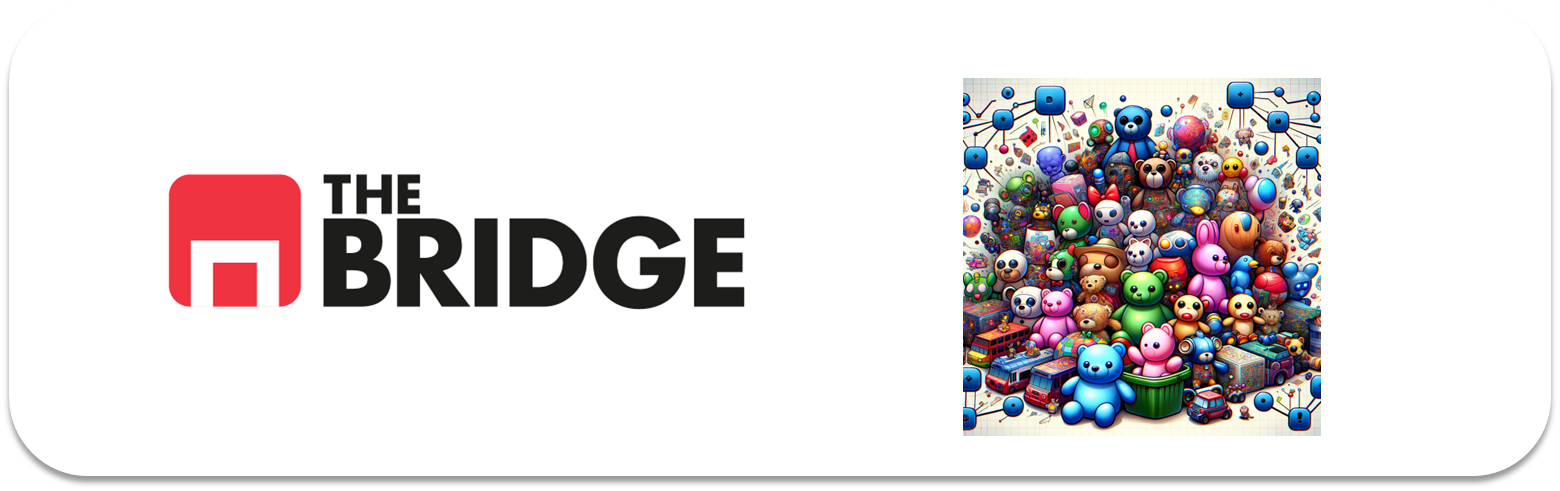

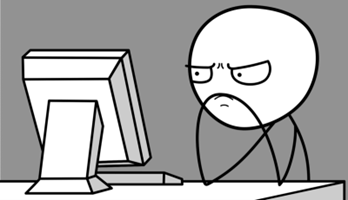

Para ejercitarte y afianzar lo aprendido sobre **DBSCAN**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Problema y "justificación": DBSCAN

Como sabemos, existen diversas técnicas de clusterización comprendidas por algoritmos de machine learning no supervisados, cuya finalidad es agrupar distintos elementos de una data sin la necesidad de estar previamente etiquetados. 

Anteriormente utilizamos el algoritmo de KMeans, sin embargo, dicho algoritmo tiene algunas limitaciones, como el hecho de que no siempre es sencillo obtener un número de K clusters óptimo o que algunas distribuciones de datos no se ajustan a la agrupación por clusters debido a la naturaleza del algoritmo. Para estos casos existen diversos algoritmos de clusterización. 

A continuación, vamos a utilizar el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para capturar grupos en data con patrones relativamente complejos.

Utilizaremos data de clientes de un distribuidor al por mayor, en el que se recogen por línea ventas a diferentes establecimientos y empresas de sus productos (aunque no se incluye el identificador de establecimiento) y cuyo objetivo es obtener agrupacioines interesantes (agrupaciones no predefinidas de productos que se suelen comprar juntos):

Features:

    1) FRESH: Gastos en productos frescos;
    2) MILK: Gastos en productos lacteos;
    3) GROCERY: Gastos en comestibles;
    4) FROZEN: Gastos en congelados;
    5) DETERGENTS_PAPER: Gastos en detergentes y derivados del papel;
    6) DELICATESSEN: Gatos en comestibles finos;
    7) CHANNEL: Canal que utilizan los clientes para vender - Horeca (Hotel/Restaurant/Cafeterías) o Retail channel (Al por menor);
    8) REGION: Región del cliente;

Fuente: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:

import numpy as np 
import pandas as pd 
import bootcampviztools as bt 
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

### Ejercicio 1

Carga los datos y haz una primera exploración, incluyendo una descripción de las variables numéricas.

In [3]:
df_customers = pd.read_csv("./data/wholesale-customers-data.csv")

df_customers.info()
df_customers.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [5]:
df_customers.describe(include="all")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


$$***$$

Es hora de hacer un miniEda (cuyo objetivo en el caso de clusterizacion no es obtener features para predicción de un target que no tenemos), cuyo objetivo es poder intuir posibles agrupaciones y su número, detectar si hay que hacer transformaciones y escalado en las variables y cuál

### Ejercicio 2



Pinta el histograma de las variables y determina cuáles podríamos considerar numéricas continuas y cuáles numéricas discretas (o categóricas)

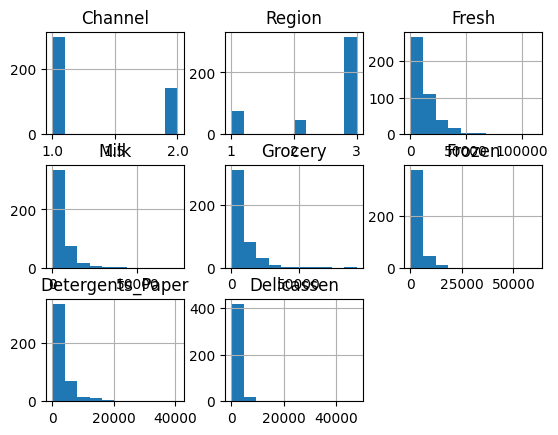

In [7]:
df_customers.hist();

*Tanto Fresh, Milk, Grozery, Frozen, Detergent Paper y Dellicatesen son numéricas discretas, asi mismo parece que Channel y Region son categóricas.*

### Ejercicio 3

Antes de decidir sobre las agrupaciones, vamos pintar los histrogramas pero separando por canal (ya que es un elemento muy diferenciador del tipo de venta que se realiza a mayorista). Muestra graficamente para cada variable numérica su histograma para cada canal (Horeca y Retail). 

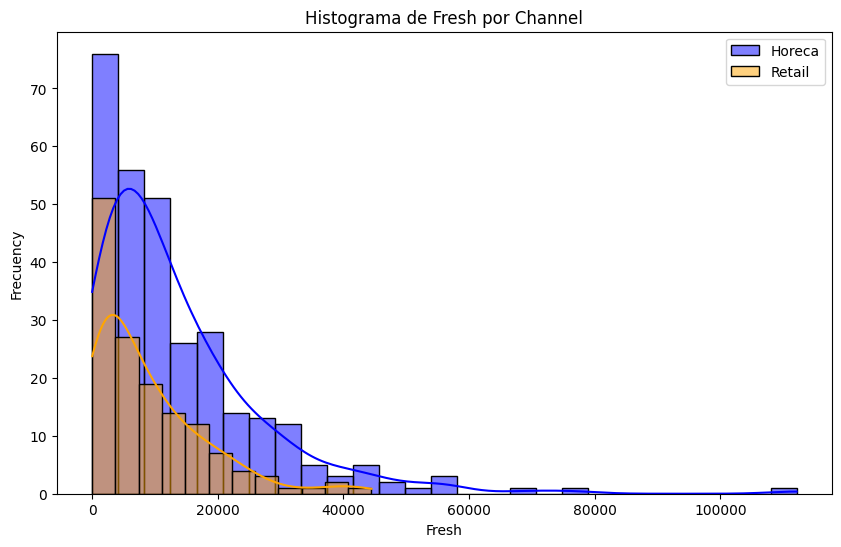

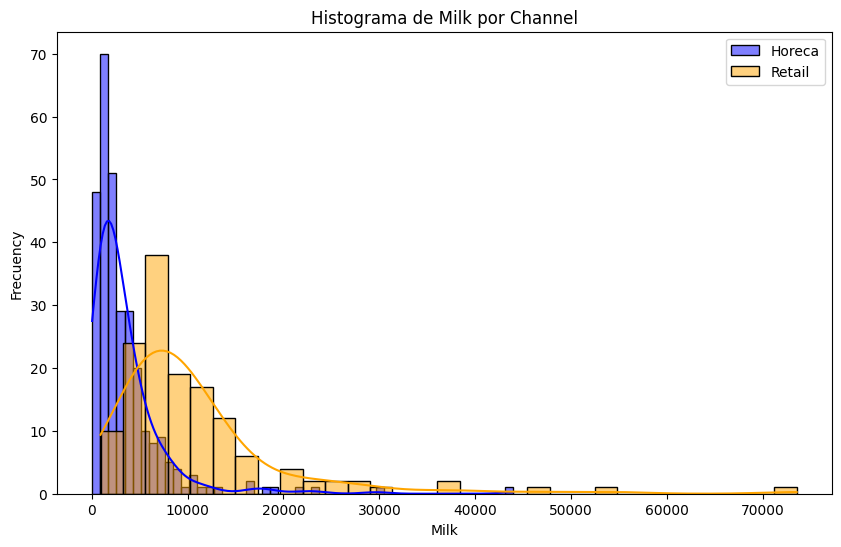

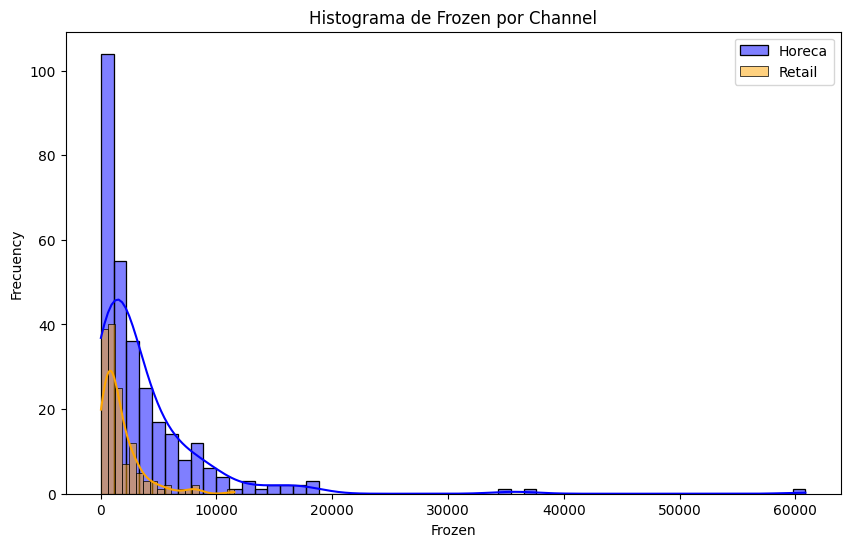

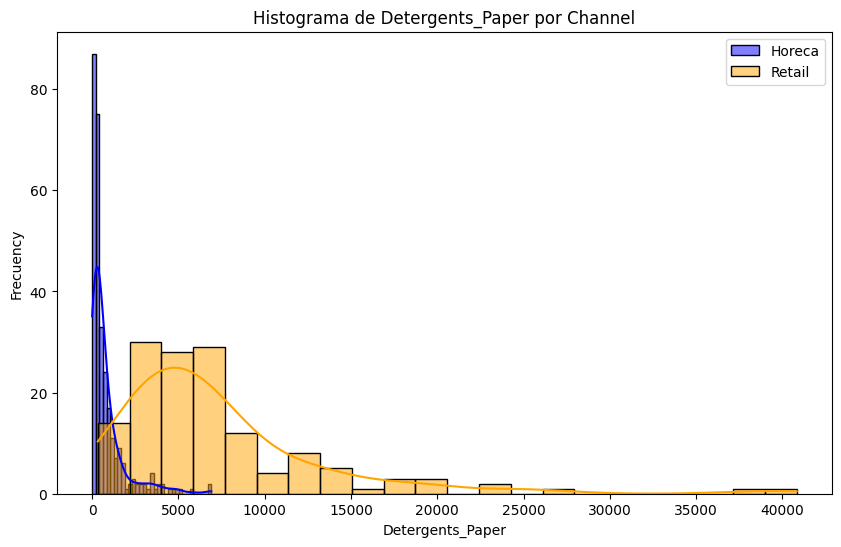

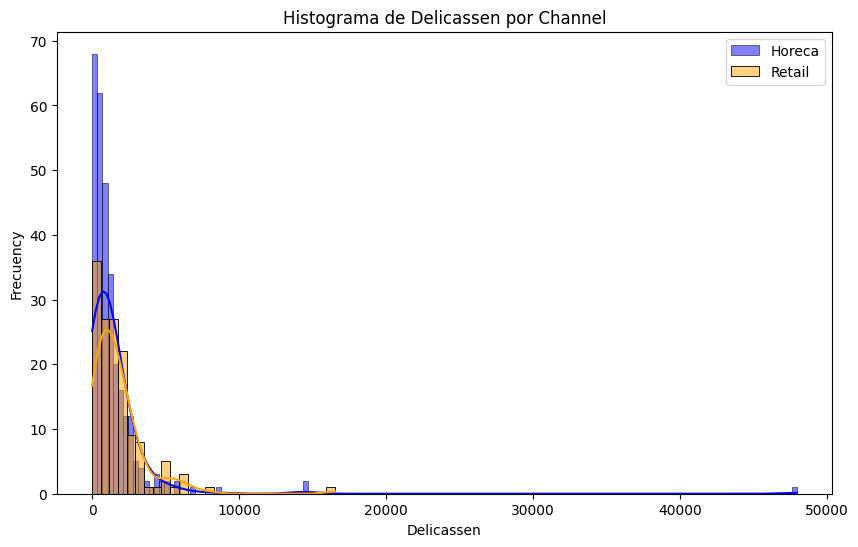

In [11]:
num_features = ["Fresh", "Milk", "Frozen", "Detergents_Paper", "Delicassen"]

horeca = df_customers[df_customers["Channel"] == 1]
retail = df_customers[df_customers["Channel"] == 2]

for var in num_features:
    plt.figure(figsize= (10,6))
    
    #Histograma Channel Retail
    sns.histplot(horeca[var], color= "blue", label = "Horeca", kde= True)
    
    #Histograma Channel Retail
    sns.histplot(retail[var], color= "orange", label = "Retail", kde = True)
    
    plt.title(f"Histograma de {var} por Channel")
    plt.xlabel(var)
    plt.ylabel("Frecuency")
    plt.legend()
    plt.show();

### Ejercicio 4

Analicemos los outliers. Obten los outliers a partir de los diagramas de boxplot para todos los datos y luego separados por canal.

In [34]:
def detectar_outliers(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - 1.5 * IQR, 0)
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    
    print(f"Variable: {variable}")
    print(f"Q1: {Q1}, Q3: {Q3}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    return outliers

In [32]:
detectar_outliers(df_customers, "Milk")


Variable: Milk
Q1: 1533.0, Q3: 7190.25
Lower Bound: -6952.875, Upper Bound: 15676.125


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,2,3,26373,36423,22019,5154,4337,16523
28,2,3,4113,20484,25957,1158,8604,5206
38,2,3,4591,15729,16709,33,6956,433
45,2,3,5181,22044,21531,1740,7353,4985
47,2,3,44466,54259,55571,7782,24171,6465
49,2,3,4967,21412,28921,1798,13583,1163
56,2,3,4098,29892,26866,2616,17740,1340
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
85,2,3,16117,46197,92780,1026,40827,2944


In [17]:
df_customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


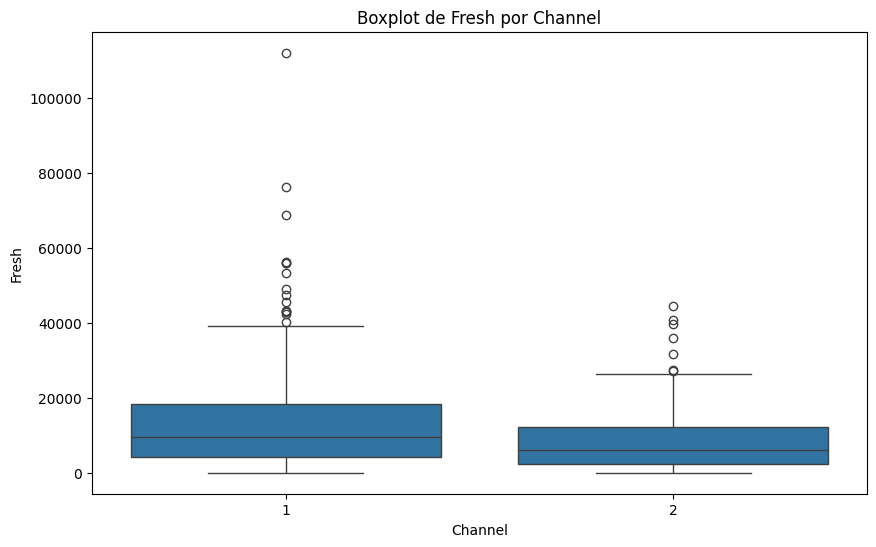

Variable: Fresh
Q1: 3127.75, Q3: 16933.75
Lower Bound: 0, Upper Bound: 37642.75

 Outliers globales en Fresh: 
      Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
29         1       3   43088   2100     2609    1200              1107   
39         1       3   56159    555      902   10002               212   
47         2       3   44466  54259    55571    7782             24171   
52         2       3   40721   3916     5876     532              2587   
87         1       3   43265   5025     8117    6312              1579   
103        1       3   56082   3504     8906   18028              1480   
125        1       3   76237   3473     7102   16538               778   
129        1       3   42312    926     1510    1718               410   
176        1       3   45640   6958     6536    7368              1532   
181        1       3  112151  29627    18148   16745              4948   
239        1       1   47493   2567     3779    5243               828   


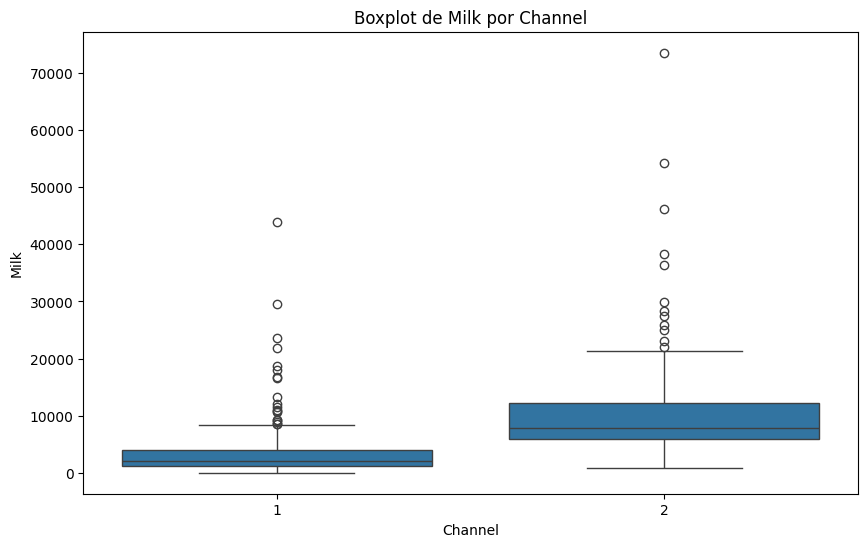

Variable: Milk
Q1: 1533.0, Q3: 7190.25
Lower Bound: 0, Upper Bound: 15676.125

 Outliers globales en Milk: 
      Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
23         2       3   26373  36423    22019    5154              4337   
28         2       3    4113  20484    25957    1158              8604   
38         2       3    4591  15729    16709      33              6956   
45         2       3    5181  22044    21531    1740              7353   
47         2       3   44466  54259    55571    7782             24171   
49         2       3    4967  21412    28921    1798             13583   
56         2       3    4098  29892    26866    2616             17740   
61         2       3   35942  38369    59598    3254             26701   
65         2       3      85  20959    45828      36             24231   
85         2       3   16117  46197    92780    1026             40827   
86         2       3   22925  73498    32114     987             20070   
92 

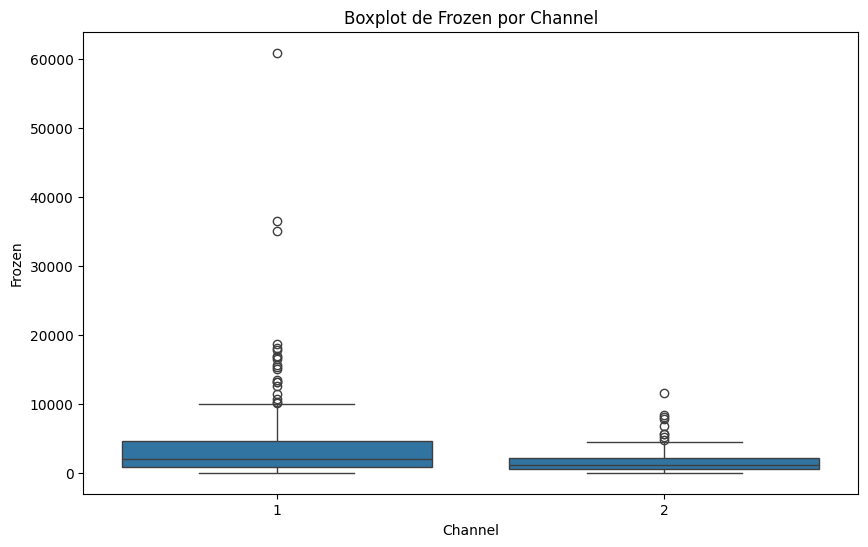

Variable: Frozen
Q1: 742.25, Q3: 3554.25
Lower Bound: 0, Upper Bound: 7772.25

 Outliers globales en Frozen: 
      Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
22         1       3   31276   1917     4469    9408              2381   
39         1       3   56159    555      902   10002               212   
40         1       3   24025   4332     4757    9510              1145   
47         2       3   44466  54259    55571    7782             24171   
70         1       3   16705   2037     3202   10643               116   
72         1       3    4420   5139     2661    8872              1321   
73         2       3   19899   5332     8713    8132               764   
88         1       3    7864    542     4042    9735               165   
91         1       3   12754   2762     2530    8693               627   
93         1       3   11314   3090     2062   35009                71   
103        1       3   56082   3504     8906   18028              1480   
1

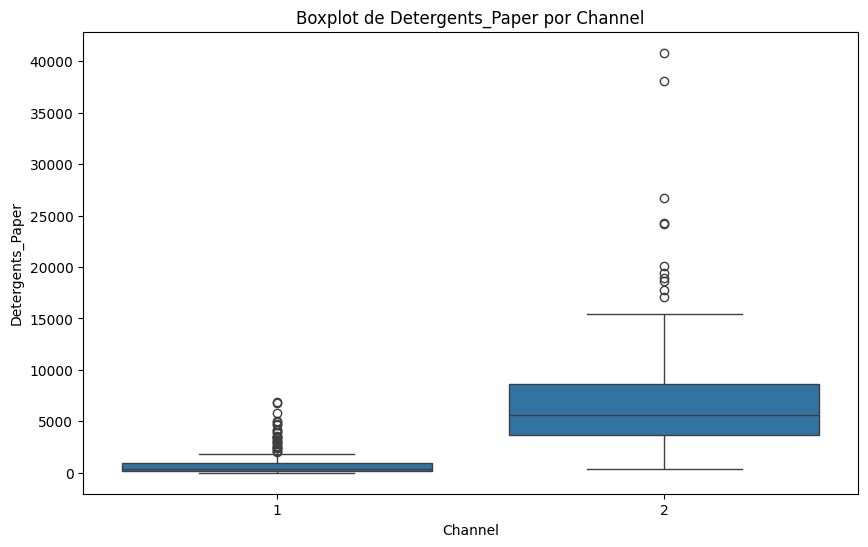

Variable: Detergents_Paper
Q1: 256.75, Q3: 3922.0
Lower Bound: 0, Upper Bound: 9419.875

 Outliers globales en Detergents_Paper: 
      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
43         2       3    630  11095    23998     787              9529   
47         2       3  44466  54259    55571    7782             24171   
49         2       3   4967  21412    28921    1798             13583   
56         2       3   4098  29892    26866    2616             17740   
61         2       3  35942  38369    59598    3254             26701   
65         2       3     85  20959    45828      36             24231   
77         2       3  12205  12697    28540     869             12034   
85         2       3  16117  46197    92780    1026             40827   
86         2       3  22925  73498    32114     987             20070   
92         2       3   9198  27472    32034    3232             18906   
145        2       3  22039   8384    34792      42             12

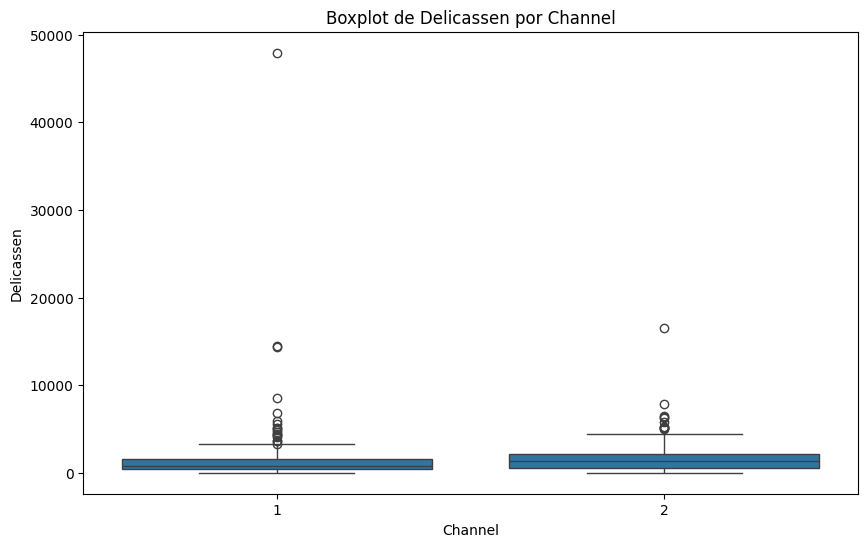

Variable: Delicassen
Q1: 408.25, Q3: 1820.25
Lower Bound: 0, Upper Bound: 3938.25

 Outliers globales en Delicassen: 
      Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
2          2       3    6353   8808     7684    2405              3516   
4          2       3   22615   5410     7198    3915              1777   
17         1       3    5876   6157     2933     839               370   
22         1       3   31276   1917     4469    9408              2381   
23         2       3   26373  36423    22019    5154              4337   
24         2       3   22647   9776    13792    2915              4482   
28         2       3    4113  20484    25957    1158              8604   
36         1       3   29955   4362     5428    1729               862   
40         1       3   24025   4332     4757    9510              1145   
45         2       3    5181  22044    21531    1740              7353   
47         2       3   44466  54259    55571    7782             24

In [35]:
for var in num_features:
    plt.figure(figsize= (10,6))
    sns.boxplot(x= "Channel", y= var, data= df_customers)
    plt.title(f"Boxplot de {var} por Channel")
    plt.show()
    
    #Detectar outliers globales
    outliers_globales = detectar_outliers(df_customers, var)
    print(f"\n Outliers globales en {var}: \n", outliers_globales)
    
    #Separar por Channel Horeca
    outliers_horeca = detectar_outliers(df_customers[df_customers["Channel"] == 1], var)
    print(f"\n Outliers en Horeca para {var}: \n", outliers_horeca)
    
    #Separar por Channel Retail
    outliers_retail = detectar_outliers(df_customers[df_customers["Channel"] == 0], var)
    print(f"\n Outliers en Retail para {var}:\n", outliers_retail)

### Ejercicio 5

Vamos a intentar detectar posibles agrupaciones en los datos con variables dos a dos. Utiliza un pairplot de sns para mostrar los scatter plots de las variables numéricas dos a dos e intentar visualizar algún clustering e incluso justificar usar kMeans o DBSCAN. En este ejercicio hazlo para todo el dataset.

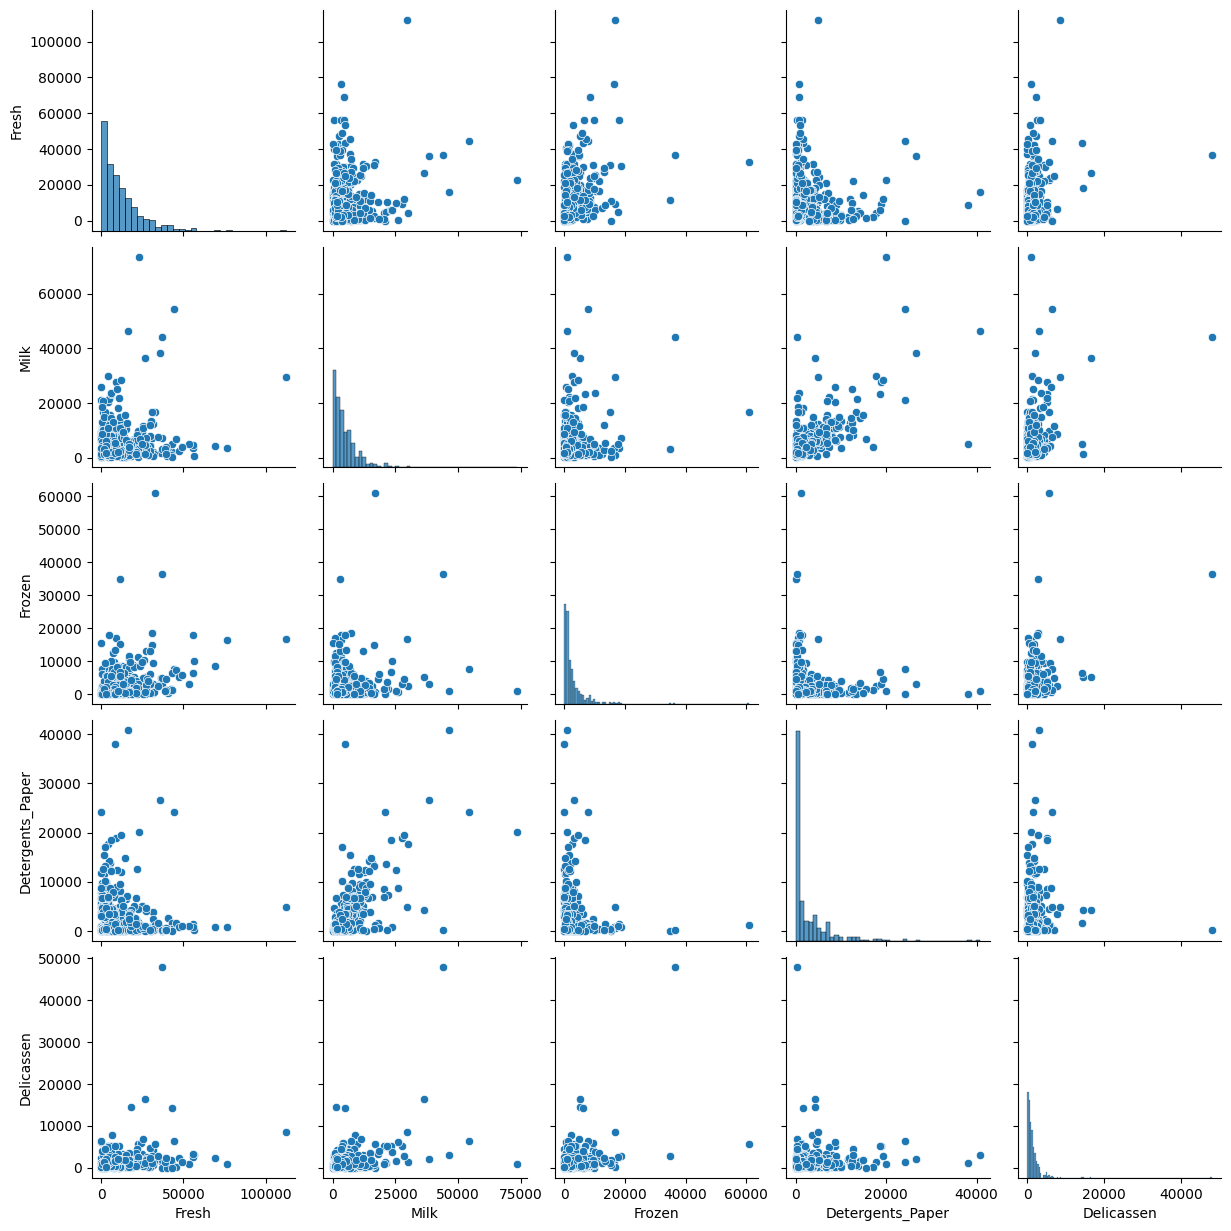

In [36]:
sns.pairplot(df_customers[num_features])

### Ejercicio 6

Repite el ejercicio 5 pero separando por canal. Emplea el argumento hue del pairplot para no tener que hacer dos pairplots diferentes. 

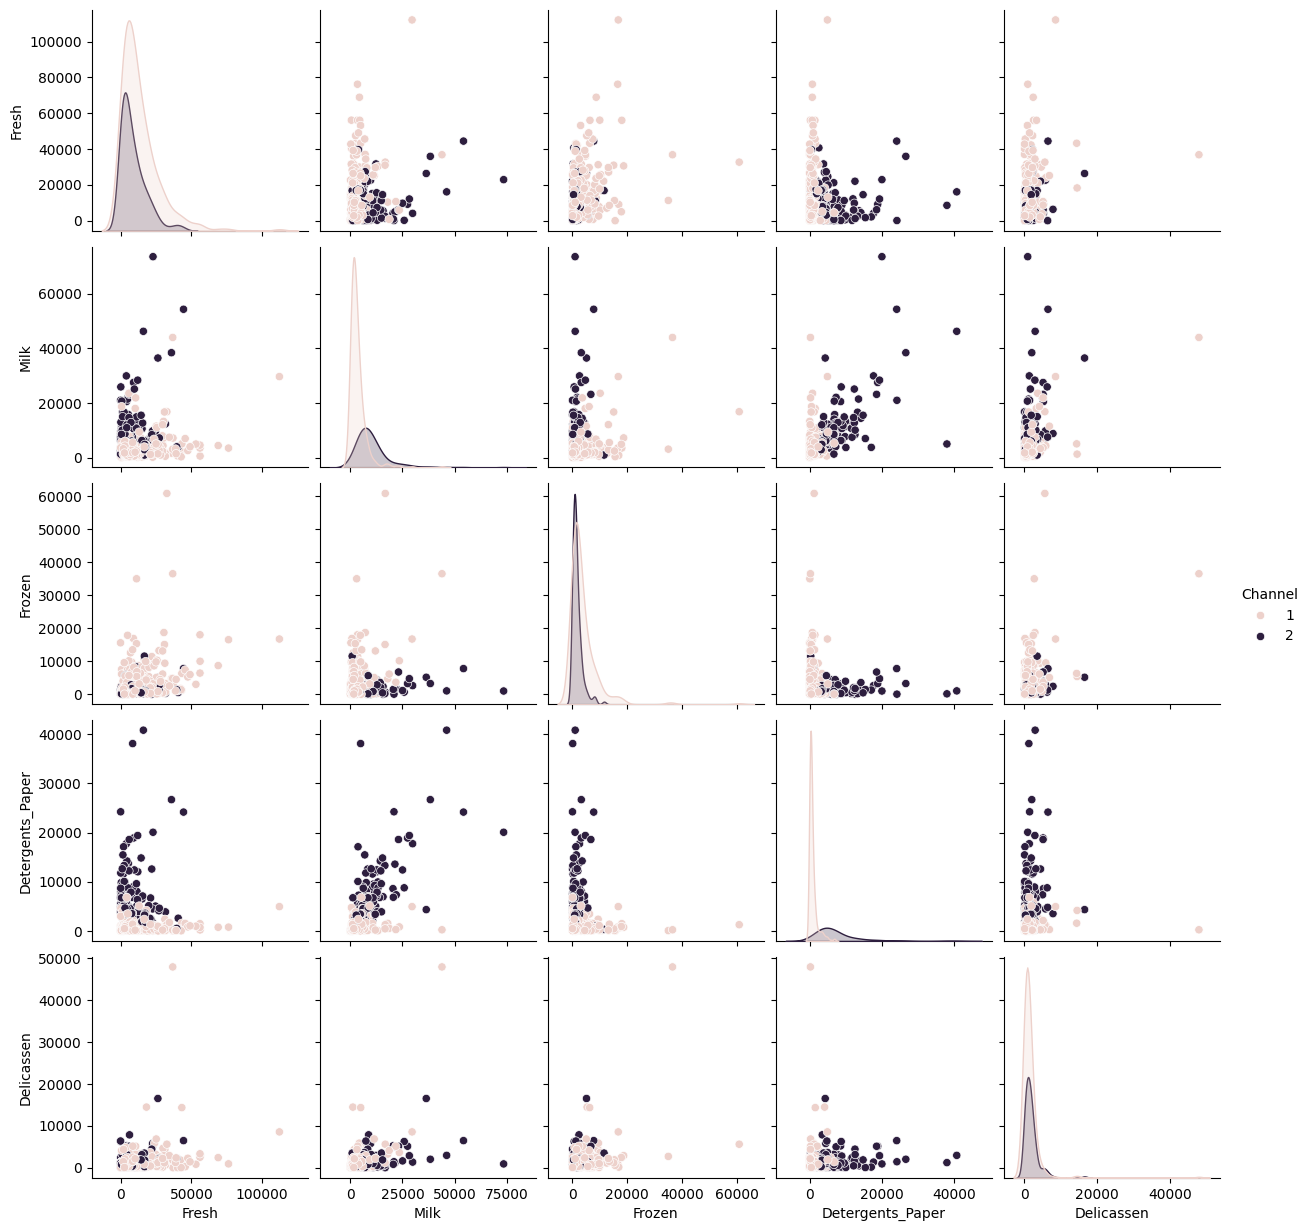

In [42]:
sns.pairplot(df_customers[num_features + ["Channel"]], hue= "Channel")

### Ejercicio 7

Si has logrado hacer los dos ejercicios anteriores (y si no consulta su solución) tendrás una idea un poco más clara de por qué es interesante la clusterización con DBSCAN mejor que con KMeans. Así que vamos a utilizarlo, pero antes escalemos los datos, transformándolos primero (de primeras no vamos a distinguir entre canales, hazlo con todo el dataseet). Es decir aplica la tranformación que creas necesaria en las columnas numéricas que creas conveniente. Hazlo en un dataframe copiado del original para poder interpretar los valores correctamente al final.

In [43]:
df_customers_copy = df_customers.copy()

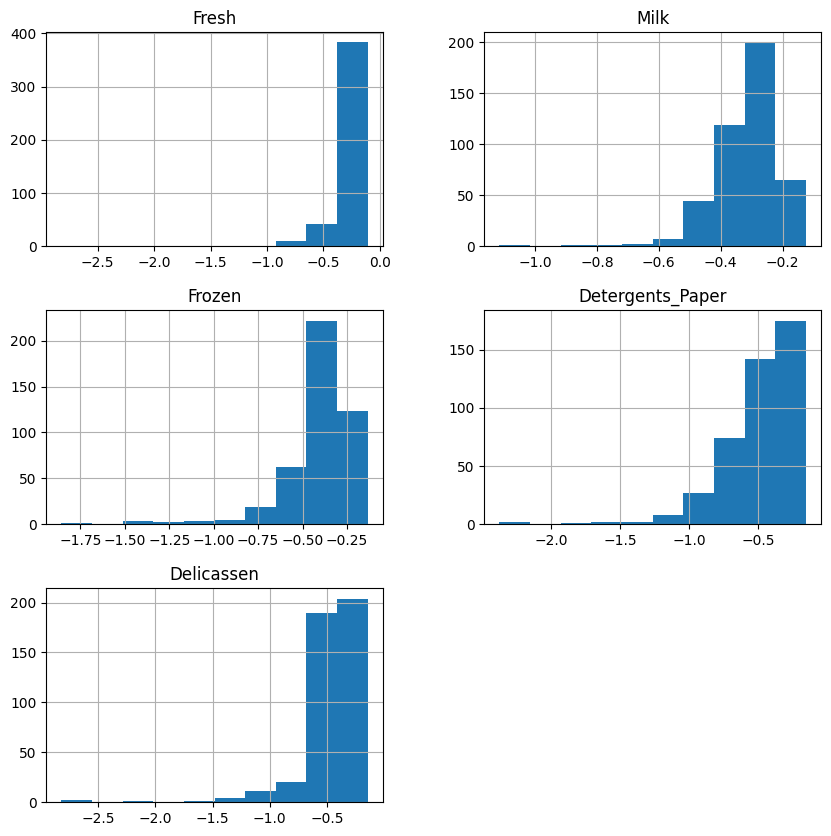

In [48]:
df_customers_copy[num_features] = df_customers_copy[num_features].apply(np.log)
df_customers_copy[num_features].hist(figsize=(10,10));

### Ejercicio 8

Escala las columnas que creas necesario. Si no lo tienes claro, escala todas.

In [49]:
scaler = StandardScaler()

df_customers_copy = scaler.fit_transform(df_customers_copy)

### Ejercicio 9

En el caso de los modelos no supervisados, una vez hemos tratado las features hay que escoger los hiperparámetros. En el caso de dBSCAN no es el número de clústeres, sino la distancia `eps` que determina el vecindario de un punto y el número de vecinos a partir del cual se decide si una instancia es core o no (`min_samples`). 

Una forma de hacerlo es iterar sobre rangos de estos dos hiperparámetros midiendo el porentaje de "anomalías" que detecta y considerando como punto de parada un valor por debajo del 10%.

NOTA: Usa el doble de cantidad de tus features para el mínimo de elementos y un rango para el epsilon de 0.001 a 3. Para min_samples vamos a usar un valor "estimado" que corresponde a 2 veces el número de features empleadas.

### Ejercicio 10

Entrena un clustering DBSCAN con el valor que hayas encontrado como mejor en el ejercicio anterior (si no has visto claramente un valor, usa eps = 2) y `min_samples` a dos veces el número de features empleadas.

### Ejercicio 11

Agrega las etiquetas generadas con DBSCAN a tu dataframe original e interpreta los resultados (observa el número de etiquetas, recuerda que -1 no es un cluster son anomalías o outliers) luego contesta a: ¿Qué grupos o patrones fué capaz de capturar el DBSCAN? (Haz las tablas de contingencia de las etiquetas con las dos variables categóricas, por separado, por ejemplo y a partir de ahí justifica tu respuesta)